<a href="https://colab.research.google.com/github/moustafa-7/EEG_Seizure_prediction/blob/master/EEG_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/3362/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1568419916&Signature=Tx4eruAHeSTqDbBlMmGB6BBY3eBKwqEmnum9pRruypFOWG7n3JByYNxvbDbUQshbLbtUvpqV4x46p8mTPbim3HuG4EaulRRiw%2BUyQvadhM5R4mvPW77hLHUcXOTl66UbQd6CrSbF%2FgWjG%2BMkzxwGcdJke0OgkzizRYlaAnjimwQFTRilJR9%2FbhDE%2BPK7NcT23uWxk1wEMebSLNqk701PvIyvh8QRRoj8MTc48rw0hs7PQUJTHx3DHoIBVwVuUzygdSuW4OsykSVQvuOArB9SdqpPd5%2BMbDtx7aUhXyYv%2FEI4dmVXgM9UOuxswTyy1jS7AkqaDagbAh2OOXk%2FdZXHXg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats.zip" -O "dogs-vs-cats.zip" -c

--2019-09-11 00:25:54--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/3362/all.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1568419916&Signature=Tx4eruAHeSTqDbBlMmGB6BBY3eBKwqEmnum9pRruypFOWG7n3JByYNxvbDbUQshbLbtUvpqV4x46p8mTPbim3HuG4EaulRRiw%2BUyQvadhM5R4mvPW77hLHUcXOTl66UbQd6CrSbF%2FgWjG%2BMkzxwGcdJke0OgkzizRYlaAnjimwQFTRilJR9%2FbhDE%2BPK7NcT23uWxk1wEMebSLNqk701PvIyvh8QRRoj8MTc48rw0hs7PQUJTHx3DHoIBVwVuUzygdSuW4OsykSVQvuOArB9SdqpPd5%2BMbDtx7aUhXyYv%2FEI4dmVXgM9UOuxswTyy1jS7AkqaDagbAh2OOXk%2FdZXHXg%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851576569 (812M) [application/zip]
Saving to: ‘dogs-vs-cats.zip’

dogs-vs-cats.zip    100%[===================>] 812.13M 

In [2]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               


In [0]:
!unzip train.zip -d data

In [0]:
import cv2
import os
import glob
img_dir = "data/train/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'cat.'+'*.jpg')
files_1 = glob.glob(data_path)

data = []
for f1 in files_1:
    img = cv2.imread(f1)
    data.append([cv2.resize(img,(128,128)),[0,1]])

In [0]:
img_dir = "data/train/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'dog.'+'*.jpg')
files_1 = glob.glob(data_path)

for f1 in files_1:
    img = cv2.imread(f1)
    data.append([cv2.resize(img,(128,128)),[1,0]])

In [3]:
len(data)

25000

In [0]:
import cv2
import os
import glob
img_dir = "drive/My Drive/trial_2/no_seizure/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files_1 = glob.glob(data_path)

data = []
for f1 in files_1[:100]:
    img = cv2.imread(f1,0)
    data.append([cv2.resize(img,(128,128)),[0,1]])

In [137]:
len(data)

100

In [33]:
data[0][0].shape

(128, 128, 3)

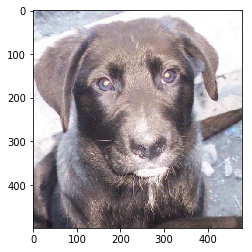

In [171]:
import matplotlib.pyplot as plt
im = cv2.imread("data/train/dog.9990.jpg")
plt.imshow(im)

(227, 227)


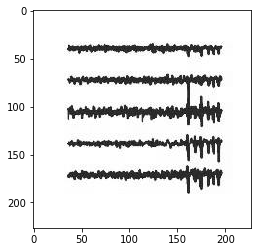

In [139]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0], cmap = "gray")
print(data[0][0].shape)

In [0]:
img_dir = "drive/My Drive/trial_2/seizure/" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files_2 = glob.glob(data_path)

for f1 in files_2:
    img = cv2.imread(f1,0)
    data.append([cv2.resize(img,(227,227)),[1,0]])

In [141]:
len(data)

168

In [0]:
import random
random.shuffle(data)

In [14]:
print(len(data))

25000


In [0]:
from numpy import newaxis
for i in range(len(data)):
  data[i][0] = data[i][0][:,:, newaxis]

In [34]:
data[100][0].shape

(227, 227, 3)

In [18]:
len(data)

25000

In [0]:
x = []
y = []

test_size = 3000

for i in range(len(data)-test_size):
  x.append(data[i][0])
  y.append(data[i][1])

In [0]:
import numpy
x = numpy.array(x)
y = numpy.array(y)

In [6]:
type(x[100])

numpy.ndarray

In [0]:
x_test = []
y_test = []

for i in range(test_size):
  x_test.append(data[len(data)-i-test_size][0])
  y_test.append(data[len(data)-i-test_size][1])

  
x_test = numpy.array(x_test)
y_test = numpy.array(y_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.optimizers import SGD
from keras import backend as K
from sklearn.metrics import precision_score, recall_score, f1_score


K.clear_session()



np.random.seed(42)
#Instantiate an empty model
model_2 = Sequential()

# 1st Convolutional Layer
model_2.add(Conv2D(filters=96, input_shape=(128,128,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model_2.add(Activation('relu'))
# Max Pooling
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model_2.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model_2.add(Activation('relu'))
# Max Pooling
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model_2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model_2.add(Activation('relu'))

# 4th Convolutional Layer
model_2.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model_2.add(Activation('relu'))
"""
# 5th Convolutional Layer
model_2.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model_2.add(Activation('relu'))
# Max Pooling
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

"""
# Passing it to a Fully Connected layer
model_2.add(Flatten())

"""
# 1st Fully Connected Layer
model_2.add(Dense(4096, input_shape=(227*227*3,)))
model_2.add(Activation('relu'))
# Add Dropout to prevent overfitting
model_2.add(Dropout(0.4))

# 2nd Fully Connected Layer
model_2.add(Dense(2048))
model_2.add(Activation('relu'))
# Add Dropout
model_2.add(Dropout(0.4))

# 3rd Fully Connected Layer
model_2.add(Dense(1000))
model_2.add(Activation('relu'))
# Add Dropout
model_2.add(Dropout(0.4))
"""
model_2.add(Dense(512))
model_2.add(Activation('relu'))
# Add Dropout
model_2.add(Dropout(0.4))


model_2.add(Dense(128))
model_2.add(Activation('relu'))
# Add Dropout
model_2.add(Dropout(0.4))



model_2.add(Dense(64))
model_2.add(Activation('relu'))
# Add Dropout
model_2.add(Dropout(0.4))


"""
model_2.add(Dense(16))
model_2.add(Activation('relu'))
# Add Dropout
model_2.add(Dropout(0.4))
"""
# Output Layer
model_2.add(Dense(2))
model_2.add(Activation('softmax'))

model_2.summary()





def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))





datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False)


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x)



epochs = 10
opt = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model_2.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy", f1_m])
#model_2.fit(x, y, batch_size=32, epochs=1, verbose=1, validation_split=0.1, shuffle='True' )

# fits the model on batches with real-time data augmentation:
model_2.fit_generator(datagen.flow(x, y, batch_size=32), steps_per_epoch=len(x) / 32, epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 256)       614656    
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)        

In [12]:
# fits the model on batches with real-time data augmentation:
model_2.fit_generator(datagen.flow(x, y, batch_size=32), steps_per_epoch=len(x) / 32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
688/687 [==============================] - 58s 85ms/step - loss: 0.2391 - acc: 0.9036 - f1_m: 0.9036 - val_loss: 1.5346 - val_acc: 0.8770 - val_f1_m: 0.8770
Epoch 2/10
688/687 [==============================] - 58s 85ms/step - loss: 0.2286 - acc: 0.9069 - f1_m: 0.9069 - val_loss: 1.1305 - val_acc: 0.9167 - val_f1_m: 0.9167
Epoch 3/10
688/687 [==============================] - 59s 85ms/step - loss: 0.2153 - acc: 0.9141 - f1_m: 0.9141 - val_loss: 0.5749 - val_acc: 0.9467 - val_f1_m: 0.9467
Epoch 4/10
688/687 [==============================] - 59s 85ms/step - loss: 0.2015 - acc: 0.9186 - f1_m: 0.9186 - val_loss: 1.5975 - val_acc: 0.8800 - val_f1_m: 0.8800
Epoch 5/10
688/687 [==============================] - 59s 86ms/step - loss: 0.1903 - acc: 0.9252 - f1_m: 0.9252 - val_loss: 1.4616 - val_acc: 0.8880 - val_f1_m: 0.8880
Epoch 6/10
688/687 [==============================] - 59s 86ms/step - loss: 0.1791 - acc: 0.9281 - f1_m: 0.9281 - val_loss: 1.7398 - val_acc: 0.8653 - val_f1_m:

In [158]:
model_2.predict(x_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [159]:
y_test

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0]])

In [52]:
x.shape

(784, 227, 227, 1)

In [61]:
x[:-50,:,:,:].shape

(734, 227, 227, 1)

In [0]:
x[:-50,:,:,:]

In [15]:
import keras
from keras.layers import LeakyReLU
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.optimizers import SGD
from keras import backend as K
from sklearn.metrics import precision_score, recall_score, f1_score

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(227, 227, 3)))
model.add(Activation('relu'))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=64, activation="relu", kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(units=12, activation="relu"))

model.add(keras.layers.Dense(units=2, activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 226, 226, 32)      416       
_________________________________________________________________
activation_3 (Activation)    (None, 226, 226, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 226, 226, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_4 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 222, 222, 64)     

In [23]:
opt = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=["accuracy"])
model.fit(x, y, batch_size=128, epochs=1, verbose=1, validation_split=0.1, shuffle='True' )

ValueError: ignored